In [1]:
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from matplotlib.patches import Patch
%matplotlib inline
l1= Patch(facecolor='blue',label = "original label 0")
l2= Patch(facecolor='red',label = "original label 1")

# DATASET = CIRCLES0.3

In [2]:
dataset1 = pd.read_csv('C:\Python37\datasets\circles0.3.csv')

In [3]:
df1=pd.DataFrame(dataset1)
df1_nolabel1 = df1.drop(['label'],axis=1)

In [4]:
model = KMeans(n_clusters=2)
model.fit(df1_nolabel1)
df1_predarray = model.fit_predict(df1_nolabel1)
df1_pred = pd.DataFrame(df1_predarray,columns =['predicted'])#converting to dataframe 
frames = [df1,df1_pred]
result = pd.concat(frames,axis=1)

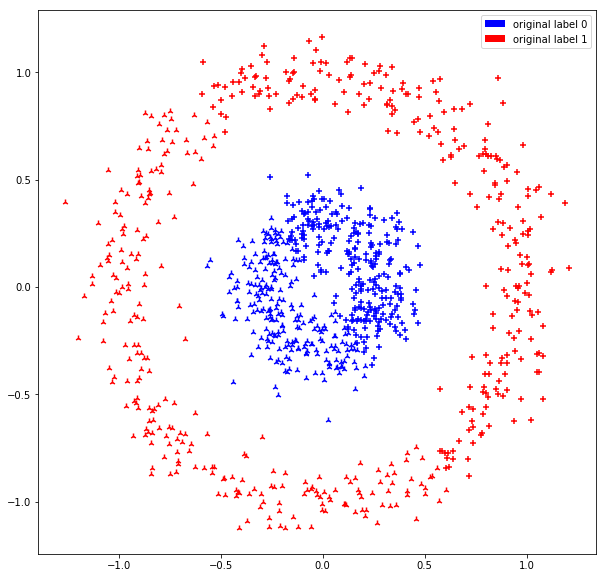

In [5]:
colors=['red' if label==0 else 'orange' for label in df1.label]
df1_00 = result.loc[result.label==0].loc[result.predicted==0]
df1_01 = result.loc[result.label==0].loc[result.predicted==1]
df1_10 = result.loc[result.label==1].loc[result.predicted==0]
df1_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df1_00.x1,df1_00.x2,c='red',marker='2')
plt.scatter(df1_01.x1,df1_01.x2,c='red',marker='+')
plt.scatter(df1_10.x1,df1_10.x2,c='blue',marker='2')
plt.scatter(df1_11.x1,df1_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [6]:
model = GaussianMixture(n_components=2)
model.fit(df1_nolabel1)
df1_predarray = model.fit_predict(df1_nolabel1)
df1_pred = pd.DataFrame(df1_predarray,columns =['predicted'])#converting to dataframe 
frames = [df1,df1_pred]
result = pd.concat(frames,axis=1)

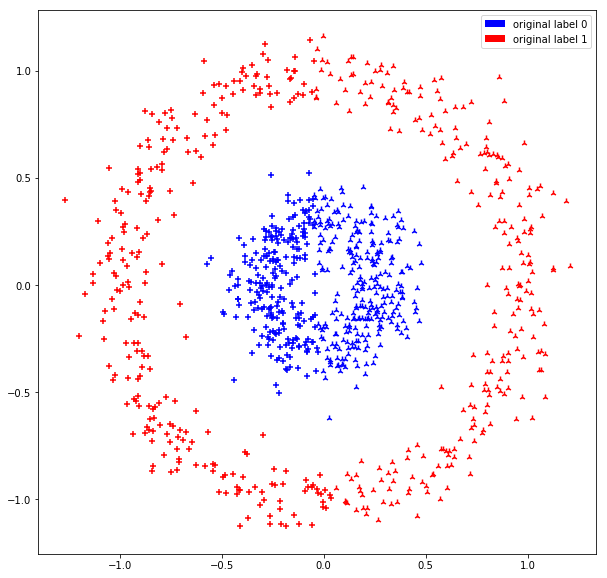

In [7]:
colors=['red' if label==0 else 'orange' for label in df1.label]
df1_00 = result.loc[result.label==0].loc[result.predicted==0]
df1_01 = result.loc[result.label==0].loc[result.predicted==1]
df1_10 = result.loc[result.label==1].loc[result.predicted==0]
df1_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df1_00.x1,df1_00.x2,c='red',marker='2')
plt.scatter(df1_01.x1,df1_01.x2,c='red',marker='+')
plt.scatter(df1_10.x1,df1_10.x2,c='blue',marker='2')
plt.scatter(df1_11.x1,df1_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [8]:
model = SpectralClustering(n_clusters=2,affinity="rbf",gamma=10)
model.fit(df1_nolabel1)
df1_predarray = model.fit_predict(df1_nolabel1)
df1_pred = pd.DataFrame(df1_predarray,columns =['predicted'])#converting to dataframe 
frames = [df1,df1_pred]
result = pd.concat(frames,axis=1)

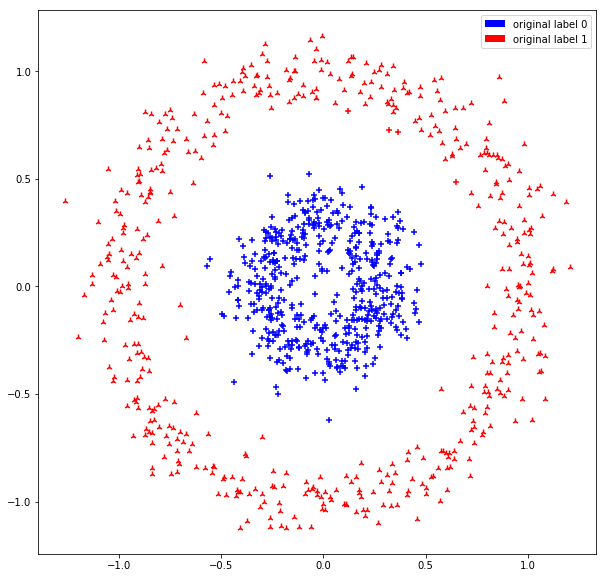

In [9]:
colors=['red' if label==0 else 'orange' for label in df1.label]
df1_00 = result.loc[result.label==0].loc[result.predicted==0]
df1_01 = result.loc[result.label==0].loc[result.predicted==1]
df1_10 = result.loc[result.label==1].loc[result.predicted==0]
df1_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df1_00.x1,df1_00.x2,c='red',marker='2')
plt.scatter(df1_01.x1,df1_01.x2,c='red',marker='+')
plt.scatter(df1_10.x1,df1_10.x2,c='blue',marker='2')
plt.scatter(df1_11.x1,df1_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

CH Score for K means
K-Means:  [460.2872809004318, 570.1508618125067, 562.541462605339, 685.5731073276743, 755.3023616582724, 791.7465205502288, 880.5186812137996, 940.5853601561204]
EM:  [451.27711660283416, 561.2450799300696, 176.98957000599583, 657.7838266956265, 650.9723545846996, 777.0816880815079, 790.4201045913392, 927.2754510546118]


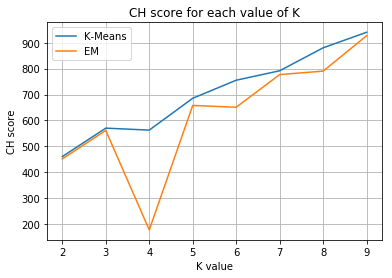

In [10]:
# metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray)
print("CH Score for K means")
km_scores,em_scores = [],[]
for k in range(2,10):
    km_model = KMeans(n_clusters=k)
    km_model.fit(df1_nolabel1)
    km_df1_predarray = km_model.fit_predict(df1_nolabel1)
    km_df1_pred = pd.DataFrame(km_df1_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray))
    km_scores.append(metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,km_df1_predarray))
    em_model = GaussianMixture(n_components=k)
    em_model.fit(df1_nolabel1)
    em_df1_predarray = em_model.fit_predict(df1_nolabel1)
    em_df1_pred = pd.DataFrame(em_df1_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,em_df1_predarray))
    em_scores.append(metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,em_df1_predarray))
print("K-Means: ",km_scores)
print("EM: ", em_scores)

plt.xlabel('K value')
plt.ylabel('CH score')
plt.title('CH score for each value of K')
plt.grid(True)
plt.plot(list(range(2,10)),km_scores,label="K-Means")
plt.plot(list(range(2,10)),em_scores,label="EM")
plt.legend()


## DATASET = HALFKERNEL 

In [11]:
dataset2 = pd.read_csv('C:\Python37\datasets\halfkernel.csv')

In [12]:
df2=pd.DataFrame(dataset2)
df2_nolabel2 = df2.drop(['label'],axis=1)

In [13]:
model = KMeans(n_clusters=2)
model.fit(df2_nolabel2)
df2_pred = model.fit_predict(df2_nolabel2)
df2_pred = pd.DataFrame(df2_pred,columns =['predicted'])#converting to dataframe 
frames = [df2,df2_pred]
result = pd.concat(frames,axis=1)

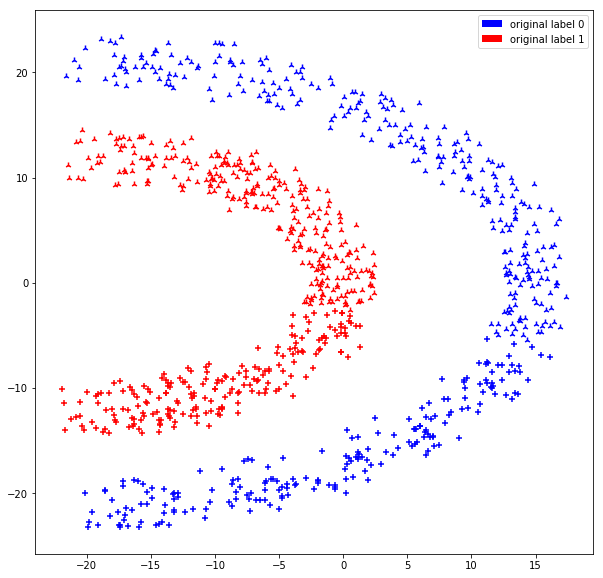

In [14]:
colors=['red' if label==0 else 'orange' for label in df2.label]
df2_00 = result.loc[result.label==0].loc[result.predicted==0]
df2_01 = result.loc[result.label==0].loc[result.predicted==1]
df2_10 = result.loc[result.label==1].loc[result.predicted==0]
df2_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df2_00.x1,df2_00.x2,c='red',marker='2')
plt.scatter(df2_01.x1,df2_01.x2,c='red',marker='+')
plt.scatter(df2_10.x1,df2_10.x2,c='blue',marker='2')
plt.scatter(df2_11.x1,df2_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [15]:
model = GaussianMixture(n_components=2)
model.fit(df2_nolabel2)
df2_predarray = model.fit_predict(df2_nolabel2)
df2_pred = pd.DataFrame(df2_predarray,columns =['predicted'])#converting to dataframe 
frames = [df2,df2_pred]
result = pd.concat(frames,axis=1)

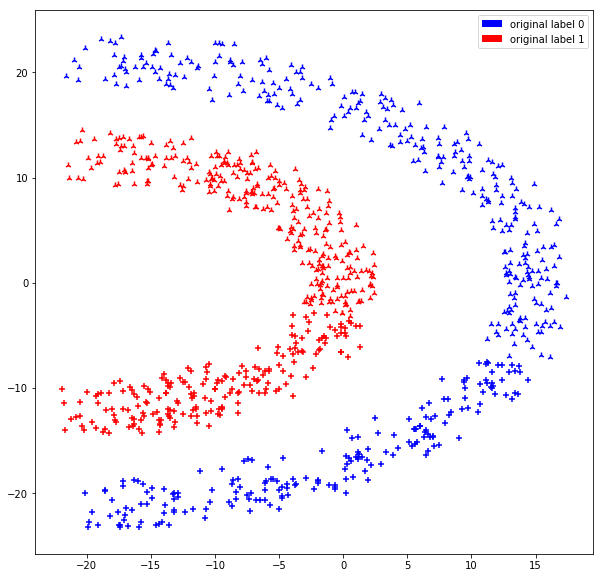

In [16]:
colors=['red' if label==0 else 'orange' for label in df2.label]
df2_00 = result.loc[result.label==0].loc[result.predicted==0]
df2_01 = result.loc[result.label==0].loc[result.predicted==1]
df2_10 = result.loc[result.label==1].loc[result.predicted==0]
df2_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df2_00.x1,df2_00.x2,c='red',marker='2')
plt.scatter(df2_01.x1,df2_01.x2,c='red',marker='+')
plt.scatter(df2_10.x1,df2_10.x2,c='blue',marker='2')
plt.scatter(df2_11.x1,df2_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [17]:
model = SpectralClustering(n_clusters=2,affinity="rbf",gamma=1)
model.fit(df2_nolabel2)
df2_predarray = model.fit_predict(df2_nolabel2)
df2_pred = pd.DataFrame(df2_predarray,columns =['predicted'])#converting to dataframe 
frames = [df2,df2_pred]
result = pd.concat(frames,axis=1)

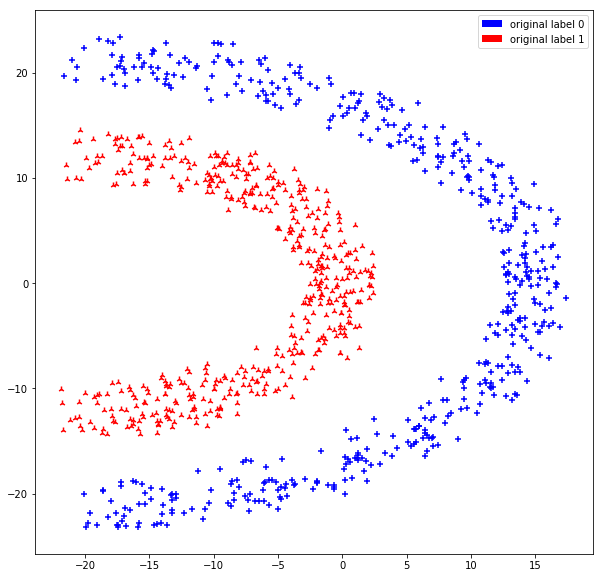

In [18]:
colors=['red' if label==0 else 'orange' for label in df2.label]
df2_00 = result.loc[result.label==0].loc[result.predicted==0]
df2_01 = result.loc[result.label==0].loc[result.predicted==1]
df2_10 = result.loc[result.label==1].loc[result.predicted==0]
df2_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df2_00.x1,df2_00.x2,c='red',marker='2')
plt.scatter(df2_01.x1,df2_01.x2,c='red',marker='+')
plt.scatter(df2_10.x1,df2_10.x2,c='blue',marker='2')
plt.scatter(df2_11.x1,df2_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

CH Score for K means
K-Means:  [823.5030813094922, 1188.776572834821, 1132.2479775414454, 1204.6445772506488, 1271.172402343824, 1304.4435011131552, 1359.0493747410158, 1442.4303176722951]
EM:  [820.6276169080147, 1169.8787841165247, 916.415387592172, 958.551169156231, 961.2964568646197, 1075.33181163376, 1013.3019208211987, 1257.5966764310092]


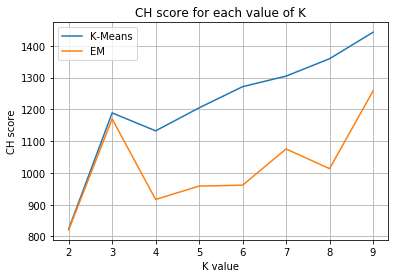

In [19]:
# metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray)
print("CH Score for K means")
km_scores,em_scores = [],[]
for k in range(2,10):
    km_model = KMeans(n_clusters=k)
    km_model.fit(df2_nolabel2)
    km_df2_predarray = km_model.fit_predict(df2_nolabel2)
    km_df2_pred = pd.DataFrame(km_df2_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray))
    km_scores.append(metrics.calinski_harabaz_score(df2.iloc[:,0:2].values,km_df2_predarray))
    em_model = GaussianMixture(n_components=k)
    em_model.fit(df2_nolabel2)
    em_df2_predarray = em_model.fit_predict(df2_nolabel2)
    em_df2_pred = pd.DataFrame(em_df2_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,em_df1_predarray))
    em_scores.append(metrics.calinski_harabaz_score(df2.iloc[:,0:2].values,em_df2_predarray))
print("K-Means: ", km_scores)
print("EM: ", em_scores)

plt.xlabel('K value')
plt.ylabel('CH score')
plt.title('CH score for each value of K')
plt.grid(True)
plt.plot(list(range(2,10)),km_scores,label="K-Means")
plt.plot(list(range(2,10)),em_scores,label="EM")
plt.legend()

## DATASET = MOONS1

In [20]:
dataset3 = pd.read_csv('C:\Python37\datasets\moons1.csv')

In [21]:
df3=pd.DataFrame(dataset3)
df3_nolabel3 = df3.drop(['label'],axis=1)

In [22]:
model = KMeans(n_clusters=2)
model.fit(df3_nolabel3)
df3_pred = model.fit_predict(df3_nolabel3)
df3_pred = pd.DataFrame(df3_pred,columns =['predicted'])#converting to dataframe 
frames = [df3,df3_pred]
result = pd.concat(frames,axis=1)

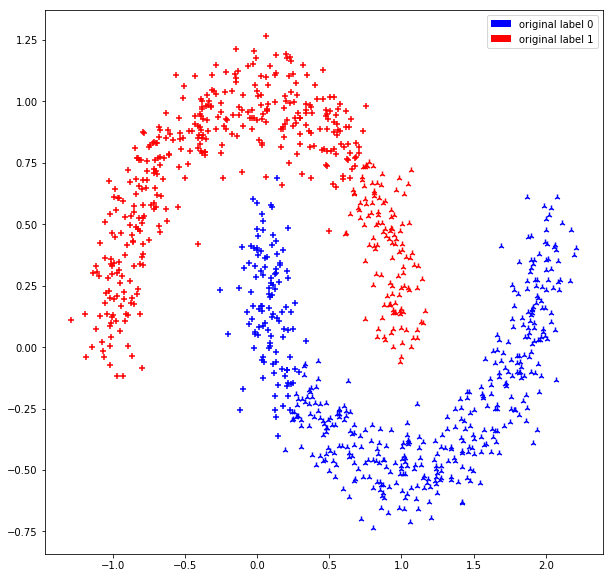

In [23]:
colors=['red' if label==0 else 'orange' for label in df3.label]
df3_00 = result.loc[result.label==0].loc[result.predicted==0]
df3_01 = result.loc[result.label==0].loc[result.predicted==1]
df3_10 = result.loc[result.label==1].loc[result.predicted==0]
df3_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df3_00.x1,df3_00.x2,c='red',marker='2')
plt.scatter(df3_01.x1,df3_01.x2,c='red',marker='+')
plt.scatter(df3_10.x1,df3_10.x2,c='blue',marker='2')
plt.scatter(df3_11.x1,df3_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [24]:
model = GaussianMixture(n_components=2)
model.fit(df3_nolabel3)
df3_pred = model.fit_predict(df3_nolabel3)
df3_pred = pd.DataFrame(df3_pred,columns =['predicted'])#converting to dataframe 
frames = [df3,df3_pred]
result = pd.concat(frames,axis=1)

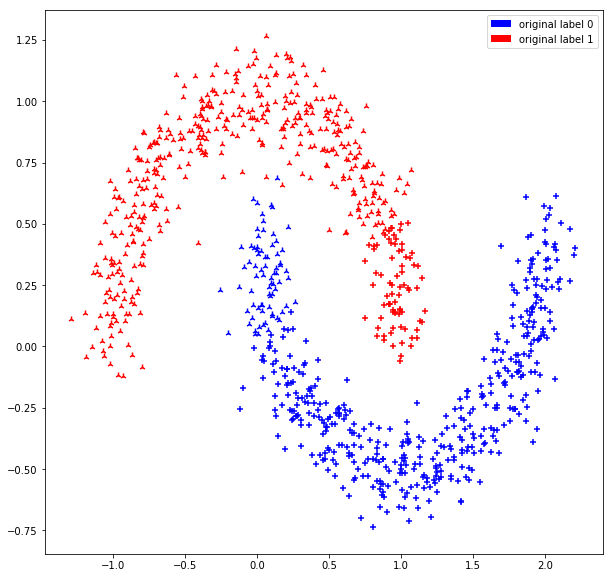

In [25]:
colors=['red' if label==0 else 'orange' for label in df3.label]
df3_00 = result.loc[result.label==0].loc[result.predicted==0]
df3_01 = result.loc[result.label==0].loc[result.predicted==1]
df3_10 = result.loc[result.label==1].loc[result.predicted==0]
df3_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df3_00.x1,df3_00.x2,c='red',marker='2')
plt.scatter(df3_01.x1,df3_01.x2,c='red',marker='+')
plt.scatter(df3_10.x1,df3_10.x2,c='blue',marker='2')
plt.scatter(df3_11.x1,df3_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [26]:
model = SpectralClustering(n_clusters=2,affinity="rbf",gamma=50)
model.fit(df3_nolabel3)
df3_predarray = model.fit_predict(df3_nolabel3)
df3_pred = pd.DataFrame(df3_predarray,columns =['predicted'])#converting to dataframe 
frames = [df3,df3_pred]
result = pd.concat(frames,axis=1)

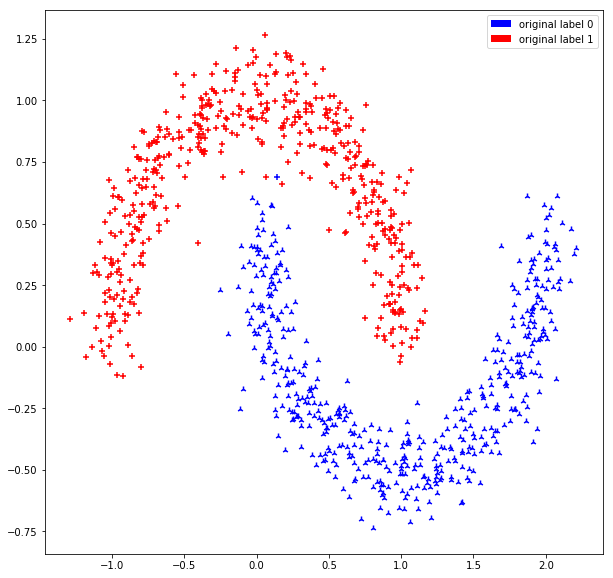

In [27]:
colors=['red' if label==0 else 'orange' for label in df3.label]
df3_00 = result.loc[result.label==0].loc[result.predicted==0]
df3_01 = result.loc[result.label==0].loc[result.predicted==1]
df3_10 = result.loc[result.label==1].loc[result.predicted==0]
df3_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df3_00.x1,df3_00.x2,c='red',marker='2')
plt.scatter(df3_01.x1,df3_01.x2,c='red',marker='+')
plt.scatter(df3_10.x1,df3_10.x2,c='blue',marker='2')
plt.scatter(df3_11.x1,df3_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

CH Score for K means
K-Means:  [1432.961728513351, 1299.6285955537235, 1492.4062838039372, 1541.6765477611286, 1844.4943693592045, 1915.7266487028471, 2115.563870793936, 2209.905366945294]
EM:  [1234.4494044143364, 1138.0712626231962, 1276.2582275757538, 1329.3400448970579, 1770.1183982449675, 1759.9977255940512, 1777.6937145464558, 2042.9787833969372]


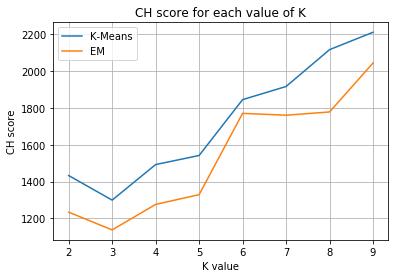

In [28]:
# metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray)
print("CH Score for K means")
km_scores,em_scores = [],[]
for k in range(2,10):
    km_model = KMeans(n_clusters=k)
    km_model.fit(df3_nolabel3)
    km_df3_predarray = km_model.fit_predict(df3_nolabel3)
    km_df3_pred = pd.DataFrame(km_df3_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray))
    km_scores.append(metrics.calinski_harabaz_score(df3.iloc[:,0:2].values,km_df3_predarray))
    em_model = GaussianMixture(n_components=k)
    em_model.fit(df3_nolabel3)
    em_df3_predarray = em_model.fit_predict(df3_nolabel3)
    em_df3_pred = pd.DataFrame(em_df3_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,em_df1_predarray))
    em_scores.append(metrics.calinski_harabaz_score(df3.iloc[:,0:2].values,em_df3_predarray))
print("K-Means: ", km_scores)
print("EM: ", em_scores)

plt.xlabel('K value')
plt.ylabel('CH score')
plt.title('CH score for each value of K')
plt.grid(True)
plt.plot(list(range(2,10)),km_scores,label="K-Means")
plt.plot(list(range(2,10)),em_scores,label="EM")
plt.legend()

## DATASET = SPIRAL1

In [29]:
dataset4 = pd.read_csv('C:\Python37\datasets\spiral1.csv')

In [30]:
df4=pd.DataFrame(dataset4)
df4_nolabel4 = df4.drop(['label'],axis=1)

In [31]:
model = KMeans(n_clusters=2)
model.fit(df4_nolabel4)
df4_pred = model.fit_predict(df4_nolabel4)
df4_pred = pd.DataFrame(df4_pred,columns =['predicted'])#converting to dataframe 
frames = [df4,df4_pred]
result = pd.concat(frames,axis=1)

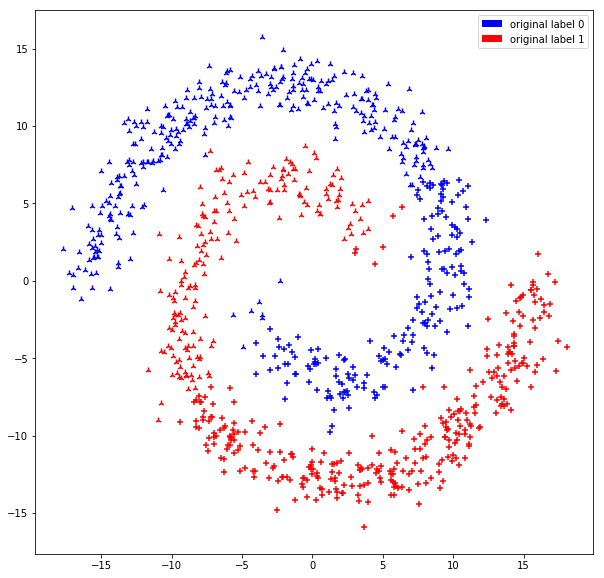

In [32]:
colors=['red' if label==0 else 'orange' for label in df4.label]
df4_00 = result.loc[result.label==0].loc[result.predicted==0]
df4_01 = result.loc[result.label==0].loc[result.predicted==1]
df4_10 = result.loc[result.label==1].loc[result.predicted==0]
df4_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df4_00.x,df4_00.y,c='red',marker='2')
plt.scatter(df4_01.x,df4_01.y,c='red',marker='+')
plt.scatter(df4_10.x,df4_10.y,c='blue',marker='2')
plt.scatter(df4_11.x,df4_11.y,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [33]:
model = GaussianMixture(n_components=2)
model.fit(df4_nolabel4)
df4_pred = model.fit_predict(df4_nolabel4)
df4_pred = pd.DataFrame(df4_pred,columns =['predicted'])#converting to dataframe 
frames = [df4,df4_pred]
result = pd.concat(frames,axis=1)

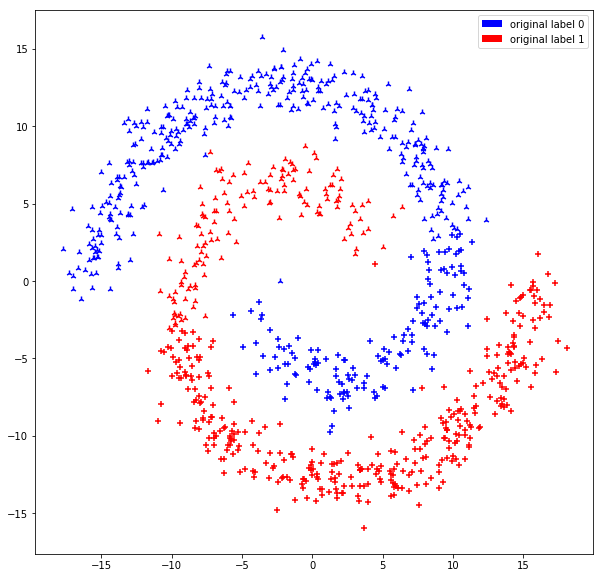

In [34]:
colors=['red' if label==0 else 'orange' for label in df4.label]
df4_00 = result.loc[result.label==0].loc[result.predicted==0]
df4_01 = result.loc[result.label==0].loc[result.predicted==1]
df4_10 = result.loc[result.label==1].loc[result.predicted==0]
df4_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df4_00.x,df4_00.y,c='red',marker='2')
plt.scatter(df4_01.x,df4_01.y,c='red',marker='+')
plt.scatter(df4_10.x,df4_10.y,c='blue',marker='2')
plt.scatter(df4_11.x,df4_11.y,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [35]:
model = SpectralClustering(n_clusters=2,affinity="rbf",gamma=2)
model.fit(df4_nolabel4)
df4_predarray = model.fit_predict(df4_nolabel4)
df4_pred = pd.DataFrame(df4_predarray,columns =['predicted'])#converting to dataframe 
frames = [df4,df4_pred]
result = pd.concat(frames,axis=1)

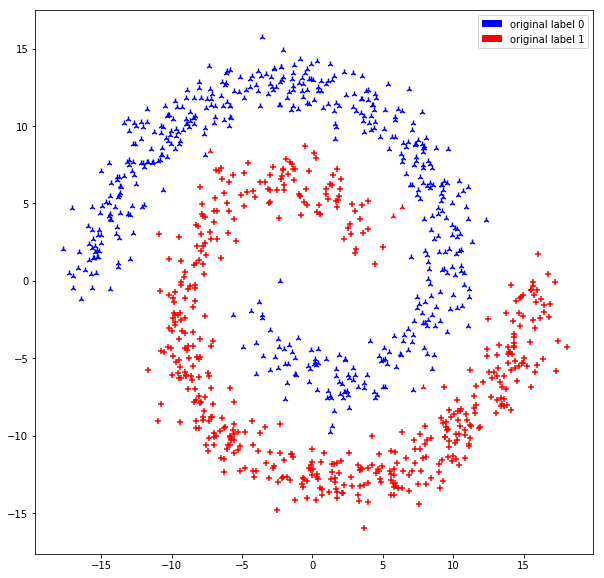

In [36]:
colors=['red' if label==0 else 'orange' for label in df4.label]
df4_00 = result.loc[result.label==0].loc[result.predicted==0]
df4_01 = result.loc[result.label==0].loc[result.predicted==1]
df4_10 = result.loc[result.label==1].loc[result.predicted==0]
df4_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df4_00.x,df4_00.y,c='red',marker='2')
plt.scatter(df4_01.x,df4_01.y,c='red',marker='+')
plt.scatter(df4_10.x,df4_10.y,c='blue',marker='2')
plt.scatter(df4_11.x,df4_11.y,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

CH Score for K means
K-Means:  [949.1564080865779, 985.0121094218789, 1213.377735170917, 1250.7931076907043, 1314.4710960343734, 1298.8722209833063, 1299.4296196739087, 1300.7563713113996]
EM:  [888.1435032677558, 965.9836205064893, 1167.2393651686684, 989.0890103581493, 1030.6649625405446, 1059.58400461722, 1021.659718396471, 1074.1806494060638]


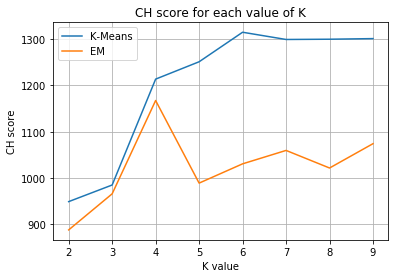

In [37]:
# metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray)
print("CH Score for K means")
km_scores,em_scores = [],[]
for k in range(2,10):
    km_model = KMeans(n_clusters=k)
    km_model.fit(df4_nolabel4)
    km_df4_predarray = km_model.fit_predict(df4_nolabel4)
    km_df4_pred = pd.DataFrame(km_df4_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray))
    km_scores.append(metrics.calinski_harabaz_score(df4.iloc[:,0:2].values,km_df4_predarray))
    em_model = GaussianMixture(n_components=k)
    em_model.fit(df4_nolabel4)
    em_df4_predarray = em_model.fit_predict(df4_nolabel4)
    em_df4_pred = pd.DataFrame(em_df4_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,em_df1_predarray))
    em_scores.append(metrics.calinski_harabaz_score(df4.iloc[:,0:2].values,em_df4_predarray))
print("K-Means: ", km_scores)
print("EM: ", em_scores)

plt.xlabel('K value')
plt.ylabel('CH score')
plt.title('CH score for each value of K')
plt.grid(True)
plt.plot(list(range(2,10)),km_scores,label="K-Means")
plt.plot(list(range(2,10)),em_scores,label="EM")
plt.legend()

## DATASET = TWOGAUSSIANS33

In [38]:
dataset5 = pd.read_csv('C:\\Python37\\datasets\\twogaussians33.csv')

In [39]:
df5=pd.DataFrame(dataset5)
df5_nolabel5 = df5.drop(['label'],axis=1)

In [40]:
model = KMeans(n_clusters=2)
model.fit(df5_nolabel5)
df5_pred = model.fit_predict(df5_nolabel5)
df5_pred = pd.DataFrame(df5_pred,columns =['predicted'])#converting to dataframe 
frames = [df5,df5_pred]
result = pd.concat(frames,axis=1)

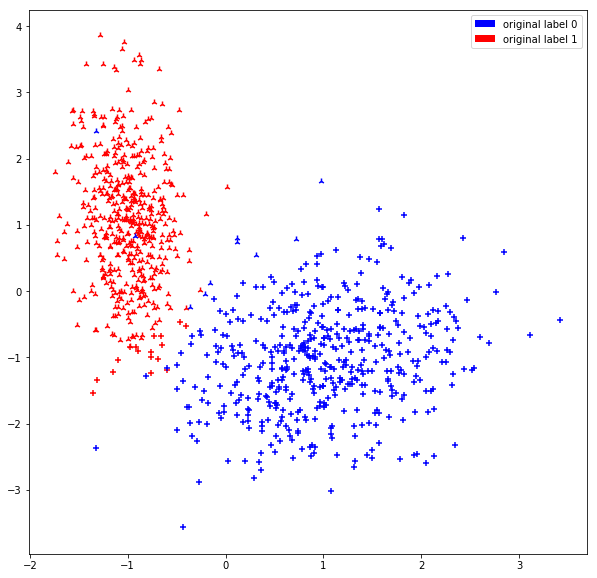

In [41]:
colors=['red' if label==0 else 'orange' for label in df5.label]
df5_00 = result.loc[result.label==0].loc[result.predicted==0]
df5_01 = result.loc[result.label==0].loc[result.predicted==1]
df5_10 = result.loc[result.label==1].loc[result.predicted==0]
df5_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df5_00.x1,df5_00.x2,c='red',marker='2')
plt.scatter(df5_01.x1,df5_01.x2,c='red',marker='+')
plt.scatter(df5_10.x1,df5_10.x2,c='blue',marker='2')
plt.scatter(df5_11.x1,df5_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [42]:
model = GaussianMixture(n_components=2)
model.fit(df5_nolabel5)
df5_pred = model.fit_predict(df5_nolabel5)
df5_pred = pd.DataFrame(df5_pred,columns =['predicted'])#converting to dataframe 
frames = [df5,df5_pred]
result = pd.concat(frames,axis=1)

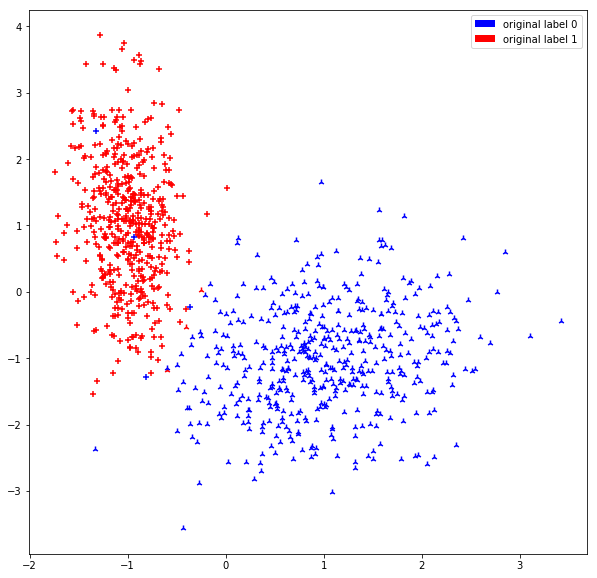

In [43]:
colors=['red' if label==0 else 'orange' for label in df5.label]
df5_00 = result.loc[result.label==0].loc[result.predicted==0]
df5_01 = result.loc[result.label==0].loc[result.predicted==1]
df5_10 = result.loc[result.label==1].loc[result.predicted==0]
df5_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df5_00.x1,df5_00.x2,c='red',marker='2')
plt.scatter(df5_01.x1,df5_01.x2,c='red',marker='+')
plt.scatter(df5_10.x1,df5_10.x2,c='blue',marker='2')
plt.scatter(df5_11.x1,df5_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [44]:
model = SpectralClustering(n_clusters=2,affinity="rbf")
model.fit(df5_nolabel5)
df5_predarray = model.fit_predict(df5_nolabel5)
df5_pred = pd.DataFrame(df5_predarray,columns =['predicted'])#converting to dataframe 
frames = [df5,df5_pred]
result = pd.concat(frames,axis=1)

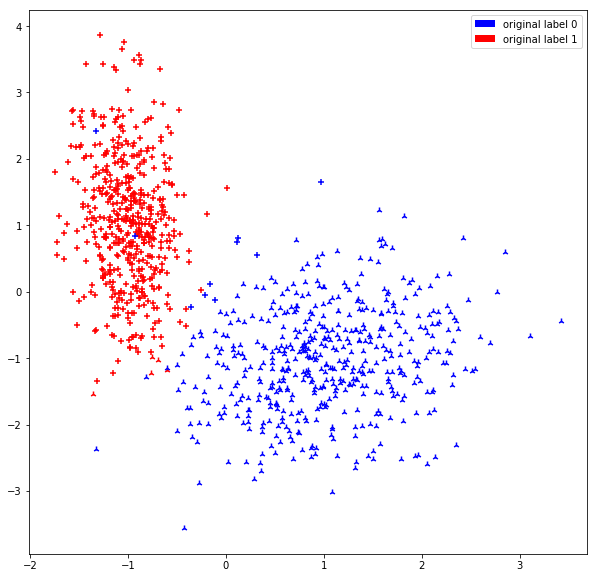

In [45]:
colors=['red' if label==0 else 'orange' for label in df5.label]
df5_00 = result.loc[result.label==0].loc[result.predicted==0]
df5_01 = result.loc[result.label==0].loc[result.predicted==1]
df5_10 = result.loc[result.label==1].loc[result.predicted==0]
df5_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df5_00.x1,df5_00.x2,c='red',marker='2')
plt.scatter(df5_01.x1,df5_01.x2,c='red',marker='+')
plt.scatter(df5_10.x1,df5_10.x2,c='blue',marker='2')
plt.scatter(df5_11.x1,df5_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

CH Score for K means
K-Means:  [1946.2649408634147, 1553.357504234373, 1585.1007988289398, 1539.1194730909926, 1518.6376339615722, 1521.5487342063486, 1478.685946525435, 1469.413714274159]
EM:  [1877.6783523820309, 1451.7287498094558, 1496.1028664413602, 1385.5711377498742, 1440.4140168781505, 1284.1119551053384, 1386.4613886558418, 1275.7833776546743]


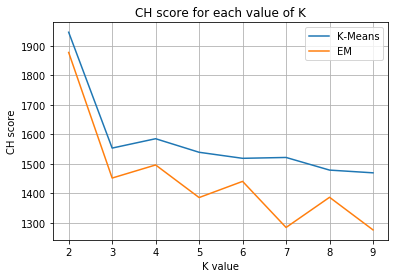

In [46]:
# metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray)
print("CH Score for K means")
km_scores,em_scores = [],[]
for k in range(2,10):
    km_model = KMeans(n_clusters=k)
    km_model.fit(df5_nolabel5)
    km_df5_predarray = km_model.fit_predict(df5_nolabel5)
    km_df5_pred = pd.DataFrame(km_df5_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray))
    km_scores.append(metrics.calinski_harabaz_score(df5.iloc[:,0:2].values,km_df5_predarray))
    em_model = GaussianMixture(n_components=k)
    em_model.fit(df5_nolabel5)
    em_df5_predarray = em_model.fit_predict(df5_nolabel5)
    em_df5_pred = pd.DataFrame(em_df5_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,em_df1_predarray))
    em_scores.append(metrics.calinski_harabaz_score(df5.iloc[:,0:2].values,em_df5_predarray))
print("K-Means: ", km_scores)
print("EM: ", em_scores)

plt.xlabel('K value')
plt.ylabel('CH score')
plt.title('CH score for each value of K')
plt.grid(True)
plt.plot(list(range(2,10)),km_scores,label="K-Means")
plt.plot(list(range(2,10)),em_scores,label="EM")
plt.legend()

## DATASET = TWOGAUSSIANS42

In [47]:
dataset6 = pd.read_csv('C:\\Python37\\datasets\\twogaussians42.csv')

In [48]:
df6=pd.DataFrame(dataset6)
df6_nolabel6 = df6.drop(['label'],axis=1)

In [49]:
model = KMeans(n_clusters=2)
model.fit(df6_nolabel6)
df6_pred = model.fit_predict(df6_nolabel6)
df6_pred = pd.DataFrame(df6_pred,columns =['predicted'])#converting to dataframe 
frames = [df6,df6_pred]
result = pd.concat(frames,axis=1)

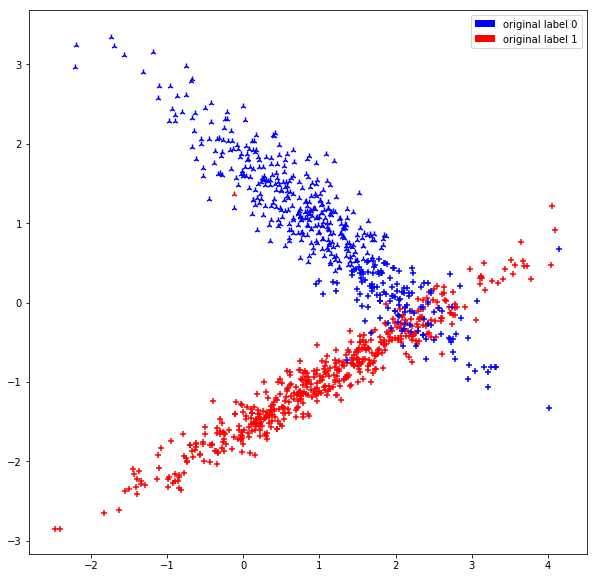

In [50]:
colors=['red' if label==0 else 'orange' for label in df6.label]
df6_00 = result.loc[result.label==0].loc[result.predicted==0]
df6_01 = result.loc[result.label==0].loc[result.predicted==1]
df6_10 = result.loc[result.label==1].loc[result.predicted==0]
df6_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df6_00.x1,df6_00.x2,c='red',marker='2')
plt.scatter(df6_01.x1,df6_01.x2,c='red',marker='+')
plt.scatter(df6_10.x1,df6_10.x2,c='blue',marker='2')
plt.scatter(df6_11.x1,df6_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [51]:
model = GaussianMixture(n_components=2)
model.fit(df6_nolabel6)
df6_pred = model.fit_predict(df6_nolabel6)
df6_pred = pd.DataFrame(df6_pred,columns =['predicted'])#converting to dataframe 
frames = [df6,df6_pred]
result = pd.concat(frames,axis=1)

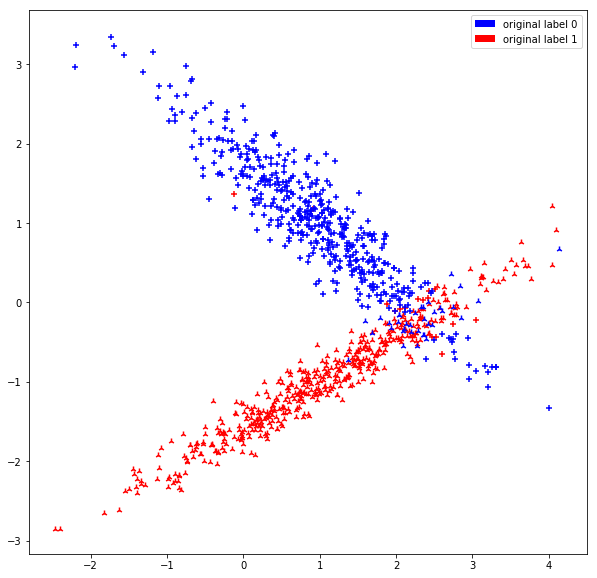

In [52]:
colors=['red' if label==0 else 'orange' for label in df6.label]
df6_00 = result.loc[result.label==0].loc[result.predicted==0]
df6_01 = result.loc[result.label==0].loc[result.predicted==1]
df6_10 = result.loc[result.label==1].loc[result.predicted==0]
df6_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df6_00.x1,df6_00.x2,c='red',marker='2')
plt.scatter(df6_01.x1,df6_01.x2,c='red',marker='+')
plt.scatter(df6_10.x1,df6_10.x2,c='blue',marker='2')
plt.scatter(df6_11.x1,df6_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

In [53]:
model = SpectralClustering(n_clusters=2,affinity="rbf", gamma=10)
model.fit(df6_nolabel6)
df6_predarray = model.fit_predict(df6_nolabel6)
df6_pred = pd.DataFrame(df6_predarray,columns =['predicted'])#converting to dataframe 
frames = [df6,df6_pred]
result = pd.concat(frames,axis=1)

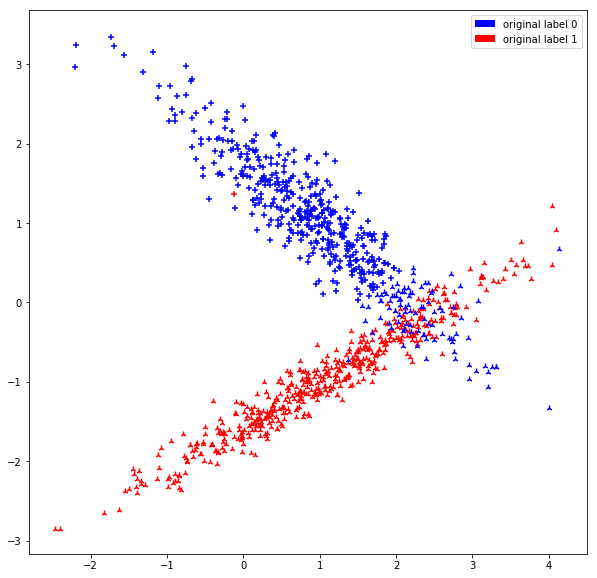

In [54]:
colors=['red' if label==0 else 'orange' for label in df6.label]
df6_00 = result.loc[result.label==0].loc[result.predicted==0]
df6_01 = result.loc[result.label==0].loc[result.predicted==1]
df6_10 = result.loc[result.label==1].loc[result.predicted==0]
df6_11 = result.loc[result.label==1].loc[result.predicted==1]
plt.figure(figsize=(10,10))
plt.scatter(df6_00.x1,df6_00.x2,c='red',marker='2')
plt.scatter(df6_01.x1,df6_01.x2,c='red',marker='+')
plt.scatter(df6_10.x1,df6_10.x2,c='blue',marker='2')
plt.scatter(df6_11.x1,df6_11.x2,c='blue',marker='+')
plt.legend(handles=[l1,l2])
plt.show()

CH Score for K means
K-Means:  [736.8651433450522, 1429.0889412496765, 1372.0996760853177, 1573.103925162103, 1559.055720976297, 1658.2528373774903, 1742.648742528749, 1817.652054103163]
EM:  [563.4093768736412, 487.1869904079199, 593.4117080272515, 720.652442563565, 768.2408879596338, 1067.964970929543, 1594.357324957335, 1761.8220218484992]


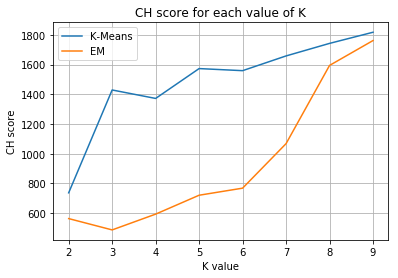

In [55]:
# metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray)
print("CH Score for K means")
km_scores,em_scores = [],[]
for k in range(2,10):
    km_model = KMeans(n_clusters=k)
    km_model.fit(df6_nolabel6)
    km_df6_predarray = km_model.fit_predict(df6_nolabel6)
    km_df6_pred = pd.DataFrame(km_df6_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metics.calinski_harabaz_score(df1.iloc[:,0:2].values,df1_predarray))
    km_scores.append(metrics.calinski_harabaz_score(df6.iloc[:,0:2].values,km_df6_predarray))
    em_model = GaussianMixture(n_components=k)
    em_model.fit(df6_nolabel6)
    em_df6_predarray = em_model.fit_predict(df6_nolabel6)
    em_df6_pred = pd.DataFrame(em_df6_predarray,columns =['predicted'])#converting to dataframe 
#     print(k,metrics.calinski_harabaz_score(df1.iloc[:,0:2].values,em_df1_predarray))
    em_scores.append(metrics.calinski_harabaz_score(df6.iloc[:,0:2].values,em_df6_predarray))
print("K-Means: ", km_scores)
print("EM: ", em_scores)

plt.xlabel('K value')
plt.ylabel('CH score')
plt.title('CH score for each value of K')
plt.grid(True)
plt.plot(list(range(2,10)),km_scores,label="K-Means")
plt.plot(list(range(2,10)),em_scores,label="EM")
plt.legend()